### 一、任务描述：IMDB电影评论处理
使用IMDB电影部分评论，进行切分、标准化（消除标点符号、大小写转换、去停用词等）、词干提取、词形还原以及高频词统计的训练。  
**输入：** 使用开源数据索引，下载IMDB电影评论数据集，使用其中部分评论（积极消极共20条）,已下载在本地的data文件夹中。  
http://ai.stanford.edu/~amaas/data/sentiment/

**输出：** 每一步都需要输出，如  

Tokenization: ["don't", 'hesitate', 'to', 'ask', 'questions', '.', 'he', 'works', 'happily', '.']  
Normalization: ['dont', 'hesitate', 'ask', 'questions', 'works', 'happily']  
Stemming: ['dont', 'hesit', 'ask', 'quest', 'work', 'happy']  
Lemmatization: ['dont', 'hesitate', 'ask', 'question', 'work', 'happily']  
Freq: 统计词频，按顺序从高到低列出前十个单词  

---

#### Step 1 Tokenization:

第一步，处理 json 文件，只考虑"reviewText"部分

第二步，分词


In [9]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp_tokenize
import json
import os

text=[]
file_list = os.listdir('data/')
for file in file_list:
    f_obj = open('data/'+file, 'r')
    line = f_obj.readline()
    text.append(line)
    #print(text)
# text[0]


TOK = []
leng = len(text)
# for i in range(len(text)):
#     st = sent_tokenize(text[i])
#     wd = [word_tokenize(j) for j in st]
#     TOK.append(wd)
    
for i in range(len(text)):
    st = sent_tokenize(text[i])
    wd = [nltk.WordPunctTokenizer().tokenize(j) for j in st]
    TOK.append(wd)
# 由于sent_tokenize分词效果有一些不理想，比如出现nt这种后缀，但这种
# 后缀在停用词内没出现
# 所以这里换用WordPunctTokenizer的tokenize进行分词效果更好一些


In [10]:
print(TOK[0])

''' 
TOK 
是一个三维数组，第一维度存放文章
第二维度存放句子
第三维存放词语
由于数据太大，ipynb内只展示一篇文章
详细输出存放在txt文件中
'''



[['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy', '.'], ['It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', ',', 'such', 'as', '"', 'Teachers', '".'], ['My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'Bromwell', 'High', "'", 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"', 'Teachers', '".'], ['The', 'scramble', 'to', 'survive', 'financially', ',', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', "'", 'pomp', ',', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', ',', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students', '.'], ['When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', ',', 'I', 'immediately', 'recalled', '.........', 'at', '..........', 'High', '.'], ['A', 'classic', 'lin

' \nTOK \n是一个三维数组，第一维度存放文章\n第二维度存放句子\n第三维存放词语\n由于数据太大，ipynb内只展示一篇文章\n详细输出存放在txt文件中\n'

---

#### Step 2 Normalization:

第三步, 标准化，即全部小写、去标点、去停用词



In [11]:
import re
import string

#print(TOK[0])
NOR = []
pattern=re.compile("[^a-zA-Z0-9\n ]")
for i in range(len(TOK)):
    tx = []
    for j in range(len(TOK[i])):
        st = []
        for k in range(len(TOK[i][j])):
            TOK[i][j][k] = re.sub(pattern, "", TOK[i][j][k]).lower()
            if (TOK[i][j][k] not in stopwords.words('english')\
                and TOK[i][j][k] != ''):
                st.append(TOK[i][j][k] )
            # print(st,'\n')
        tx.append(st)
    NOR.append(tx)
print(TOK[0],'\n')
print(NOR[0])
# 篇幅受限 只输出第一篇文章

[['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', ''], ['it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', '', 'such', 'as', '', 'teachers', ''], ['my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'high', '', 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '', 'teachers', ''], ['the', 'scramble', 'to', 'survive', 'financially', '', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', '', 'pomp', '', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', '', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', ''], ['when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', '', 'i', 'immediately', 'recalled', '', 'at', '', 'high', ''], ['a', 'classic', 'line', '', 'inspector', '', 'i', '', '

---

#### Step 3 Stemming:

第四步，词干提取



In [12]:
from nltk.stem.porter import PorterStemmer

PS = []
all_p = []
for i in range(len(NOR)):
    tx = []
    for j in range(len(NOR[i])):
        st = []
        for k in NOR[i][j]:
            pt_stem = PorterStemmer().stem(k)
            st.append(pt_stem)
            all_p.append(pt_stem)
            # print(st,'\n')
        tx.append(st)
    PS.append(tx)
print(NOR[0],"\n")
print(PS[0])
# 篇幅受限 只输出第一篇文章

[['bromwell', 'high', 'cartoon', 'comedy'], ['ran', 'time', 'programs', 'school', 'life', 'teachers'], ['35', 'years', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'high', 'satire', 'much', 'closer', 'reality', 'teachers'], ['scramble', 'survive', 'financially', 'insightful', 'students', 'see', 'right', 'pathetic', 'teachers', 'pomp', 'pettiness', 'whole', 'situation', 'remind', 'schools', 'knew', 'students'], ['saw', 'episode', 'student', 'repeatedly', 'tried', 'burn', 'school', 'immediately', 'recalled', 'high'], ['classic', 'line', 'inspector', 'sack', 'one', 'teachers'], ['student', 'welcome', 'bromwell', 'high'], ['expect', 'many', 'adults', 'age', 'think', 'bromwell', 'high', 'far', 'fetched'], ['pity']] 

[['bromwel', 'high', 'cartoon', 'comedi'], ['ran', 'time', 'program', 'school', 'life', 'teacher'], ['35', 'year', 'teach', 'profess', 'lead', 'believ', 'bromwel', 'high', 'satir', 'much', 'closer', 'realiti', 'teacher'], ['scrambl', 'surviv', 'financi', 'insight', 

----

#### Step 4 Lemmatization:

第五步，词形还原



In [13]:
# 需要下载词库
# 直接执行报错的话可以打开cmd，输入python后再执行以下代码
# import nltk
# nltk.download('averaged_perceptron_tagger')

In [14]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
WNL_n = []
all_n = []
WNL_v = []
all_v = []
for i in range(len(NOR)):
    txn = []
    txv = []
    for j in range(len(NOR[i])):
        stn = []
        stv = []
        for k in NOR[i][j]:
            nlem = lem.lemmatize(k, pos = 'n')
            vlem = lem.lemmatize(k, pos = 'v')
            stn.append(nlem)
            all_n.append(nlem)
            stv.append(vlem)
            all_v.append(vlem)
        txn.append(stn)
        txv.append(stv)
    WNL_n.append(txn)
    WNL_v.append(txv)
    
print(NOR[0],"\n")
print("The noun change \n", WNL_n[0],"\n")
print("The verb change \n", WNL_v[0])
# 篇幅受限 只输出第一篇文章

[['bromwell', 'high', 'cartoon', 'comedy'], ['ran', 'time', 'programs', 'school', 'life', 'teachers'], ['35', 'years', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'high', 'satire', 'much', 'closer', 'reality', 'teachers'], ['scramble', 'survive', 'financially', 'insightful', 'students', 'see', 'right', 'pathetic', 'teachers', 'pomp', 'pettiness', 'whole', 'situation', 'remind', 'schools', 'knew', 'students'], ['saw', 'episode', 'student', 'repeatedly', 'tried', 'burn', 'school', 'immediately', 'recalled', 'high'], ['classic', 'line', 'inspector', 'sack', 'one', 'teachers'], ['student', 'welcome', 'bromwell', 'high'], ['expect', 'many', 'adults', 'age', 'think', 'bromwell', 'high', 'far', 'fetched'], ['pity']] 

The noun change 
 [['bromwell', 'high', 'cartoon', 'comedy'], ['ran', 'time', 'program', 'school', 'life', 'teacher'], ['35', 'year', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'high', 'satire', 'much', 'closer', 'reality', 'teacher'], ['scramble', 'su

----
#### Step 5 Freq:

第六步，统计词频，取前十个单词

运行结果：不同处理方式得到的具体数字有所偏差，选用词干提取或者词形还原的结果也有
所不同。此处仅供参考。

<img src="./images/image1.png" width="80%" height="20%" />

[('br', 52), ('film', 25), ('movie', 20), ('like', 18), ('story', 17), ('turtle', 16), ('time', 13), ('one', 13), ('show', 13), ('good', 12)]


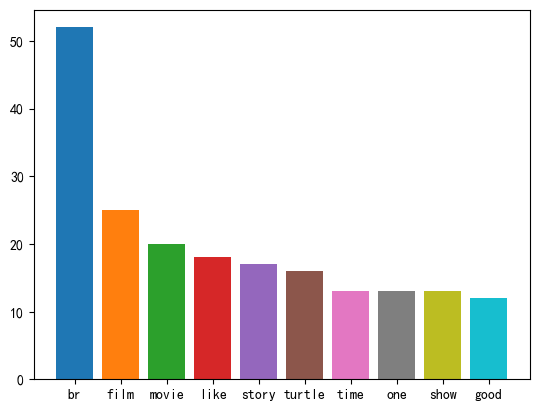

[('br', 52), ('film', 25), ('like', 19), ('movie', 17), ('turtle', 16), ('get', 14), ('story', 14), ('time', 13), ('show', 13), ('one', 12)]


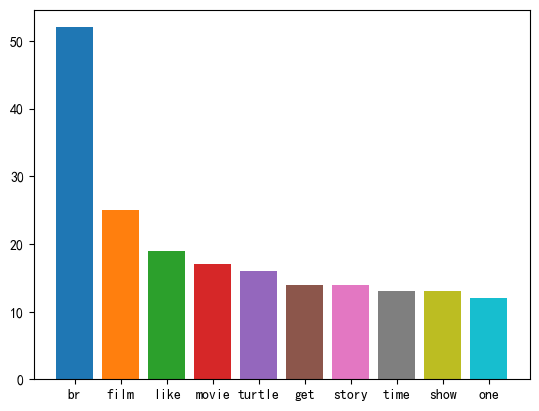

[('br', 52), ('film', 25), ('movi', 20), ('like', 19), ('stori', 17), ('turtl', 16), ('time', 13), ('one', 13), ('show', 13), ('good', 12)]


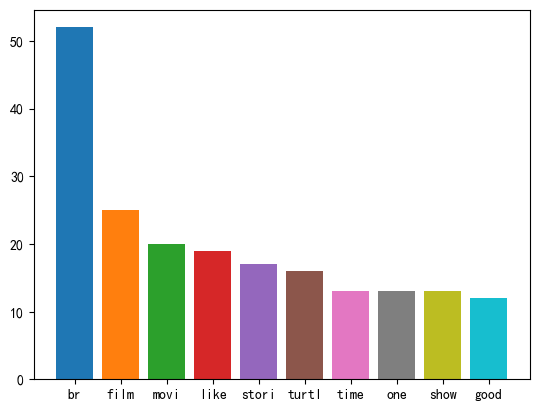

[('br', 52), ('film', 25), ('movie', 20), ('like', 18), ('story', 17), ('turtle', 16), ('time', 13), ('one', 13), ('show', 13), ('good', 12)]


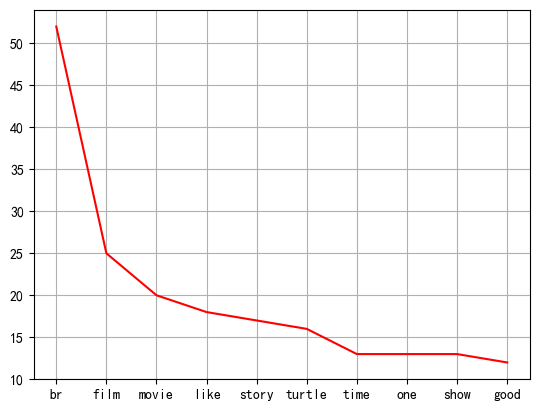

[('br', 52), ('film', 25), ('like', 19), ('movie', 17), ('turtle', 16), ('get', 14), ('story', 14), ('time', 13), ('show', 13), ('one', 12)]


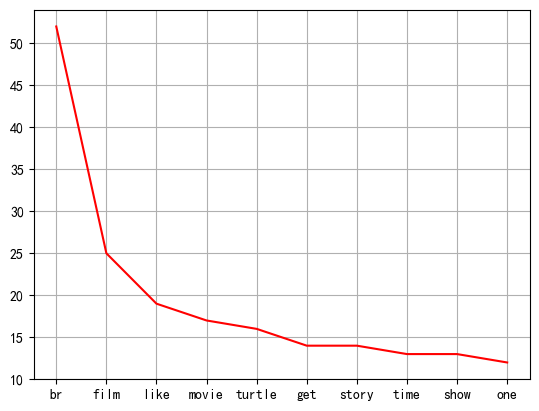

[('br', 52), ('film', 25), ('movi', 20), ('like', 19), ('stori', 17), ('turtl', 16), ('time', 13), ('one', 13), ('show', 13), ('good', 12)]


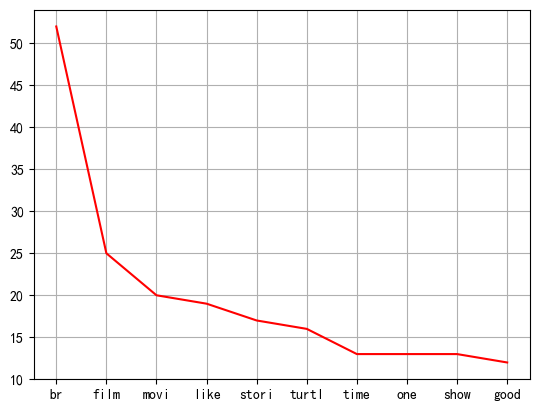

In [15]:
from collections import Counter

# print(all_v)
# import inspect
# def varname(p):
#     for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
#         m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)',line)
#         if m:
#             return m.group(1)

import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False

temp = [all_n, all_v, all_p]
for i in temp:
    cnter = Counter(i).most_common(10)
    print(cnter)
    x = ["{}".format(i[0]) for i in cnter]
    y = [i[1] for i in cnter]
    for i in range(len(x)):
        plt.bar(x[i], y[i])
    plt.show()
for i in temp:
    cnter = Counter(i).most_common(10)
    print(cnter)
    x = ["{}".format(i[0]) for i in cnter]
    y = [i[1] for i in cnter]
    plt.plot(x, y, color = 'r')
    plt.grid()
    plt.show()


-----------------------------------------
### 二、任务描述：基于规则的中文分词方法
任务描述：
1）依据给定的文本和词表，实现正向最大匹配、逆向最大匹配和双向最大匹配算法。
2）jieba分词使用尝试

-----------------------------------------
### 正向最大匹配算法
sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'
}

dictionary = [中文分词词典]


In [20]:
sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'}

dictionary = []
dict_file = open('./dict/dict.txt.small', 'r', encoding='utf-8')
for line in dict_file.readlines():
    line=line.strip('\n')
    dictionary.append(line)

MAX_LENGTH = 5  # 定义单词最大长度,可自由尝试不同长度单词匹配
# print(dictionary)

def forward_match(st, dic, max_len):
    div_res = []
    location = 0
    while location < len(st):                       # 遍历整个字符串
        longest_word = st[location]         
        for i in range(location + 1, len(st) + 1):  # 在不超MAX_LENGTH的情况下往后加单个字符判断是否满足要求
            temp_word = st[location : i]
            if len(temp_word) > max_len:        
                break
            if temp_word in dic:
                if len(temp_word) > len(longest_word):
                    longest_word = temp_word
        div_res.append(longest_word)                # 加入结果
        location += len(longest_word)
    return div_res

print("MAX_LENGTH = 5")
for i in sentences:
    out = forward_match(sentences[i], dictionary, MAX_LENGTH)
    print(out)
#print(forward_match())
print("MAX_LENGTH = 4")
for i in sentences:
    out = forward_match(sentences[i], dictionary, 4)
    print(out)
print("MAX_LENGTH = 3")
for i in sentences:
    out = forward_match(sentences[i], dictionary, 3)
    print(out)
print("MAX_LENGTH = 2")
for i in sentences:
    out = forward_match(sentences[i], dictionary, 2)
    print(out)


MAX_LENGTH = 5
['南京市', '长江大桥', '成功', '落', '建']
['北京大学', '生前', '来', '应聘']
['北京大学', '生', '喝', '进口', '红酒']
['在', '北京大学', '生活区', '喝', '进口', '红酒']
['这块', '地面', '积', '还', '真', '不小']
MAX_LENGTH = 4
['南京市', '长江大桥', '成功', '落', '建']
['北京大学', '生前', '来', '应聘']
['北京大学', '生', '喝', '进口', '红酒']
['在', '北京大学', '生活区', '喝', '进口', '红酒']
['这块', '地面', '积', '还', '真', '不小']
MAX_LENGTH = 3
['南京市', '长江', '大桥', '成功', '落', '建']
['北京', '大学生', '前来', '应聘']
['北京', '大学生', '喝', '进口', '红酒']
['在', '北京', '大学生', '活', '区', '喝', '进口', '红酒']
['这块', '地面', '积', '还', '真', '不小']
MAX_LENGTH = 2
['南京', '市长', '江', '大桥', '成功', '落', '建']
['北京', '大学', '生前', '来', '应聘']
['北京', '大学', '生', '喝', '进口', '红酒']
['在', '北京', '大学', '生活', '区', '喝', '进口', '红酒']
['这块', '地面', '积', '还', '真', '不小']


-----------------------------------------
### 逆向最大匹配算法
sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'
}

dictionary = [中文分词词典]


In [21]:
sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'}

dictionary = []
dict_file = open('./dict/dict.txt.small', 'r', encoding='utf-8')
for line in dict_file.readlines():
    line=line.strip('\n')
    dictionary.append(line)

MAX_LENGTH = 5  # 定义单词最大长度,可自由尝试不同长度单词匹配

def backward_match(st, dic, max_len):
    # 本质就是前缀反过来
    div_res = []
    location = 0
    st = st[::-1]
    while location < len(st):           #原理同forward，在处理过程中需要加入reverse操作来保证语义通顺
        longest_word = st[location]     #不加的话从右往左看其实也是可以的
        for i in range(location + 1, len(st) + 1):
            temp_word = st[location : i]
            if len(temp_word) > max_len:
                break
            temp_word = temp_word[::-1]
            if temp_word in dic:
                if len(temp_word) > len(longest_word):
                    longest_word = temp_word
        div_res.append(longest_word)
        location += len(longest_word)
    div_res.reverse()
    return div_res

print("MAX_LENGTH = 5")
for i in sentences:
    out = backward_match(sentences[i], dictionary, MAX_LENGTH)
    print(out)
print("MAX_LENGTH = 4")
for i in sentences:
    out = backward_match(sentences[i], dictionary, 4)
    print(out)
print("MAX_LENGTH = 3")
for i in sentences:
    out = backward_match(sentences[i], dictionary, 3)
    print(out)
print("MAX_LENGTH = 2")
for i in sentences:
    out = backward_match(sentences[i], dictionary, 2)
    print(out)

MAX_LENGTH = 5
['南京市', '长江大桥', '成功', '落', '建']
['北京', '大学生', '前来', '应聘']
['北京', '大学生', '喝', '进口', '红酒']
['在', '北京大学', '生活区', '喝', '进口', '红酒']
['这块', '地', '面积', '还', '真', '不小']
MAX_LENGTH = 4
['南京市', '长江大桥', '成功', '落', '建']
['北京', '大学生', '前来', '应聘']
['北京', '大学生', '喝', '进口', '红酒']
['在', '北京大学', '生活区', '喝', '进口', '红酒']
['这块', '地', '面积', '还', '真', '不小']
MAX_LENGTH = 3
['南京市', '长江', '大桥', '成功', '落', '建']
['北京', '大学生', '前来', '应聘']
['北京', '大学生', '喝', '进口', '红酒']
['在', '北京', '大学', '生活区', '喝', '进口', '红酒']
['这块', '地', '面积', '还', '真', '不小']
MAX_LENGTH = 2
['南京', '市', '长江', '大桥', '成功', '落', '建']
['北京', '大', '学生', '前来', '应聘']
['北京', '大', '学生', '喝', '进口', '红酒']
['在', '北京', '大学', '生活', '区', '喝', '进口', '红酒']
['这块', '地', '面积', '还', '真', '不小']


---------------------------------------
### 双向最大匹配算法
sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'
}

dictionary = [中文分词词典]

选择正向还是逆向最大匹配算法的原则：
•  大颗粒度词越多越好
•  非词典词和单字词越少越好的原则选取

<img src="./images/image2.png" width="80%" height="20%" />

**需要同学们根据上述内容自行进行规则设计，实现双向最大匹配算法中对正向还是逆向最大匹配算法的选取，根据规则设计的详尽程度评分！**

**需要在代码中注释说明设计的规则！**

In [22]:
from numpy import single


sentences = {0:'南京市长江大桥成功落建',
1:'北京大学生前来应聘',
2:'北京大学生喝进口红酒',
3:'在北京大学生活区喝进口红酒',
4:'这块地面积还真不小'}

dictionary = []
dict_file = open('./dict/dict.txt.small', 'r', encoding='utf-8')
for line in dict_file.readlines():
    line=line.strip('\n')
    dictionary.append(line)

MAX_LENGTH = 5  # 定义单词最大长度,可自由尝试不同长度单词匹配



def bidir_match_1(st, dic, max_len):
    fm = forward_match(st, dic, max_len)
    bm = backward_match(st, dic, max_len)

    lenf = len(fm)                              # 分词数量
    lenb = len(bm)
    singlef = sum(1 for i in fm if len(i) == 1) # 单字数量
    singleb = sum(1 for i in bm if len(i) == 1)
    bigf = sum(len(i)** 1.2 for i in fm)           # 高颗粒度词 给1.2次幂避免权重过大
    bigb = sum(len(i)** 1.2 for i in bm)            

    evaluation_f = bigf - 3 * (lenf + singlef)        # 高颗粒度 - 分词 - 单字作为输出指标
    evaluation_b = bigb - 3 * (lenb + singleb)
    if evaluation_f > evaluation_b:
        return "forward",fm
    else:
        return "backward",bm


# 也可以不依靠权重，直接嵌套if else
def bidir_match_2(st, dic, max_len):
    fm = forward_match(st, dic, max_len)
    bm = backward_match(st, dic, max_len)

    lenf = len(fm)                              # 分词数量
    lenb = len(bm)

    if lenf > lenb:
        return "back", bm
    elif lenf < lenb:
        return "forward",fm
    else:
        # 分词数量一致，比较单字符数
        singlef = sum(1 for i in fm if len(i) == 1) # 单字数量
        singleb = sum(1 for i in bm if len(i) == 1)
        if singlef < singleb:
            return "forward", fm
        elif singlef > singleb:
            return "back",bm
        else:
            bigf = sum(len(i)** 2 for i in fm)       
            bigb = sum(len(i)** 2 for i in bm)    
            if bigf > bigb: #返回颗粒度大的
                return "for",fm    
            else:
                return "back",bm

for i in sentences:
    out = bidir_match_1(sentences[i], dictionary, MAX_LENGTH)
    print(out)
    out = bidir_match_2(sentences[i], dictionary, MAX_LENGTH)
    print(out)
for i in sentences:
    out = bidir_match_1(sentences[i], dictionary, 4)
    print(out)
    out = bidir_match_2(sentences[i], dictionary, 4)
    print(out)
for i in sentences:
    out = bidir_match_1(sentences[i], dictionary, 3)
    print(out)
    out = bidir_match_2(sentences[i], dictionary, 3)
    print(out)
for i in sentences:
    out = bidir_match_1(sentences[i], dictionary, 2)
    print(out)
    out = bidir_match_2(sentences[i], dictionary, 2)
    print(out)

# 测试后发现上面的句子全都是Backward比较高效

('backward', ['南京市', '长江大桥', '成功', '落', '建'])
('back', ['南京市', '长江大桥', '成功', '落', '建'])
('backward', ['北京', '大学生', '前来', '应聘'])
('back', ['北京', '大学生', '前来', '应聘'])
('backward', ['北京', '大学生', '喝', '进口', '红酒'])
('back', ['北京', '大学生', '喝', '进口', '红酒'])
('backward', ['在', '北京大学', '生活区', '喝', '进口', '红酒'])
('back', ['在', '北京大学', '生活区', '喝', '进口', '红酒'])
('backward', ['这块', '地', '面积', '还', '真', '不小'])
('back', ['这块', '地', '面积', '还', '真', '不小'])
('backward', ['南京市', '长江大桥', '成功', '落', '建'])
('back', ['南京市', '长江大桥', '成功', '落', '建'])
('backward', ['北京', '大学生', '前来', '应聘'])
('back', ['北京', '大学生', '前来', '应聘'])
('backward', ['北京', '大学生', '喝', '进口', '红酒'])
('back', ['北京', '大学生', '喝', '进口', '红酒'])
('backward', ['在', '北京大学', '生活区', '喝', '进口', '红酒'])
('back', ['在', '北京大学', '生活区', '喝', '进口', '红酒'])
('backward', ['这块', '地', '面积', '还', '真', '不小'])
('back', ['这块', '地', '面积', '还', '真', '不小'])
('backward', ['南京市', '长江', '大桥', '成功', '落', '建'])
('back', ['南京市', '长江', '大桥', '成功', '落', '建'])
('backward', ['北京', 

--------------------------------------------
### jieba分词使用尝试
对sentences字典内每一句话尝试结巴分词的全模式，精确模式，新词模式和搜索引擎模式。

-----------------------------------------

In [19]:
import jieba
sentences = {
    0:'没有什么比时间更具有说服力了，因为时间无需通知我们就可以改变一切。',
    1:'检验一个人的标准，就是看他把时间放在了哪儿。别自欺欺人；当生命走到尽头，只有时间不会撒谎。',
    2:'近年来，卷积神经网络因其优异的性能，在计算机视觉、自然语言处理等各个领域受到了研究者们的青睐',
    3:'来自北京大学、东方理工、南方科技大学和鹏城实验室等机构的研究团队提出了一种语义可解释人工智能的研究框架，该框架从语义层面解释了卷积神经网络的学习机制。'
}

for i in sentences:
    print("Streamlining:", ' '.join(jieba.cut(sentences[i])))
    print("Full:", ' '.join(jieba.cut(sentences[i], cut_all = True)))
    print("Search engine: ", " ".join(jieba.lcut_for_search(sentences[i]) ))
    print()
    

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lx\AppData\Local\Temp\jieba.cache
Loading model cost 0.410 seconds.
Prefix dict has been built successfully.


Streamlining: 没有 什么 比 时间 更 具有 说服力 了 ， 因为 时间 无需 通知 我们 就 可以 改变 一切 。
Full: 没有 什么 比 时间 更具 具有 说服 说服力 了 ， 因为 时间 无需 通知 我们 就 可以 改变 一切 。
Search engine:  没有 什么 比 时间 更 具有 说服 说服力 了 ， 因为 时间 无需 通知 我们 就 可以 改变 一切 。

Streamlining: 检验 一个 人 的 标准 ， 就是 看 他 把 时间 放在 了 哪儿 。 别 自欺欺人 ； 当 生命 走 到 尽头 ， 只有 时间 不会 撒谎 。
Full: 检验 一个 个人 的 标准 ， 就是 看 他 把 时间 放在 了 哪儿 。 别 自欺 自欺欺人 ； 当 生命 走到 尽头 ， 只有 有时 时间 不会 撒谎 。
Search engine:  检验 一个 人 的 标准 ， 就是 看 他 把 时间 放在 了 哪儿 。 别 自欺 自欺欺人 ； 当 生命 走 到 尽头 ， 只有 时间 不会 撒谎 。

Streamlining: 近年来 ， 卷积 神经网络 因 其 优异 的 性能 ， 在 计算机 视觉 、 自然语言 处理 等 各个领域 受到 了 研究者 们 的 青睐
Full: 近年 近年来 年来 ， 卷积 神经 神经网 神经网络 网络 因其 优异 的 性能 ， 在 计算 计算机 算机 视觉 、 自然 自然语言 语言 处理 等 各个 各个领域 领域 受到 了 研究 研究者 们 的 青睐
Search engine:  近年 年来 近年来 ， 卷积 神经 网络 神经网 神经网络 因 其 优异 的 性能 ， 在 计算 算机 计算机 视觉 、 自然 语言 自然语言 处理 等 各个 领域 各个领域 受到 了 研究 研究者 们 的 青睐

Streamlining: 来自 北京大学 、 东方 理工 、 南方 科技 大学 和 鹏城 实验室 等 机构 的 研究 团队 提出 了 一种 语义 可 解释 人工智能 的 研究 框架 ， 该 框架 从 语义 层面 解释 了 卷积 神经网络 的 学习 机制 。
Full: 来自 北京 北京大学 大学 、 东方 方理 理工 、 南方 科技 大学 和 鹏城 实验 实验室 等 机构 的 研究 团队 提出 了 一种 语义 可 解释

In [1]:
# _*_ coding:utf-8 _*_
from numpy import *
import re
import random

def loadDataSet(): #创建样例数据
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                   ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0, 1, 0, 1, 0, 1]  #1代表脏话
    return postingList, classVec

def createVocabList(dataSet):  #创建词库 这里就是直接把所有词去重后，当作词库
    vocabSet = set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
        # print(document, " ?")
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):  #文本词向量。词库中每个词当作一个特征，文本中就该词，该词特征就是1，没有就是0
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
            # print(vocabList.index(word), word)
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec


def trainNB0(trainMatrix, trainCategory):
    print(trainMatrix ,"matrix")
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)
    p0Num = ones(numWords) #防止某个类别计算出的概率为0，导致最后相乘都为0，所以初始词都赋值1，分母赋值为2.
    p1Num = ones(numWords)
    p0Denom = 2
    p1Denom = 2
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = log(p1Num / p1Denom)  #这里使用了Log函数，方便计算，因为最后是比较大小，所有对结果没有影响。
    p0Vect = log(p0Num / p0Denom)
    print(p0Num,p0Denom,'\n\n',p1Num, p1Denom)
    return p0Vect, p1Vect, pAbusive

def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1): #比较概率大小进行判断，
    p1 = sum(vec2Classify*p1Vec)+log(pClass1)
    p0 = sum(vec2Classify*p0Vec)+log(1-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

def testingNB():
    listOPosts,listClasses = loadDataSet()#创建样例数据
    myVocabList = createVocabList(listOPosts)
    #创建词库 这里就是直接把所有词去重后，当作词库
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    # for i in trainMat:
    #     print(sum(i))

    p0V,p1V,pAb = trainNB0(array(trainMat),array(listClasses))
    testEntry = ['love', 'my', 'dalmation'] # 测试数据
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry = ['stupid', 'garbage'] # 测试数据
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

if __name__=='__main__':
    testingNB()

[[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0]] matrix
[1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 3. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 2. 1. 4. 2.] 26 

 [2. 1. 1. 3. 1. 2. 2. 1. 4. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 3.
 1. 1. 2. 1. 1. 2. 1. 1.] 21
['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1
